# ACALib Testing Notebook

This document show the API of ACALib.

## Initialization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from astropy import *

# Paths
import sys
sys.path.append('../ACALIB/')
binpath = '../bindata/fits/cubes/'
orion_path = binpath + 'Orion.methanol.cbc.contsub.image.fits'

from acalib import *

/Users/mauricio/anaconda/envs/jupyter/lib/python3.5/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


## Non Object Oriented UPI

### Container
Test: load a fits (orion) in a container and get the primary image. Save the container as a `copy.fits` and do an `ls` to check the file is there.

In [2]:
%rm copy.fits
cont  = load_fits(orion_path)
orion = cont.primary
save_fits(cont,"copy.fits")
orion.meta

INFO: Processing HDU 0 (Image) [acalib.io.fits]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.fits]


SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
NAXIS3  =                   41                                                  
NAXIS4  =                    1                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   5.261126491759E-04                                                  
BMIN    =   3.823845585187E-04                                                  
BPA     =   1.648626861572E+02                                                  
BTYPE   = 'Intensity'       

In [3]:
%ls

ACALIB UPI Test.ipynb         Gaussian ROI Detect.ipynb
ACALib FONDEF.ipynb           Pywavelet-Segmentation.ipynb
AContainer Example.ipynb      README.md
AData Example.ipynb           Test Refactor Indexing.ipynb
CUPID Test.ipynb              copy.fits
First_Look_at_Imaging.ipynb


### Axes Information
Check information about the axes.

In [4]:
axnames = axes_names(orion)
print(axnames)

['FREQ' 'DEC' 'RA']


In [5]:
orion_extent = extent(orion)
orion_extent

(array([<Quantity 229763161321.4 Hz>, <Quantity -5.381944419104788 deg>,
        <Quantity 83.81537182195012 deg>], dtype=object),
 array([<Quantity 229743139540.44766 Hz>, <Quantity -5.370833307976727 deg>,
        <Quantity 83.80421161323083 deg>], dtype=object))

In [6]:
orion_center = center(orion)
orion_center

array([<Quantity 229763161321.4 Hz>, <Quantity -5.376388888889 deg>,
       <Quantity 83.80979166667 deg>], dtype=object)

In [7]:
orion_resolution = resolution(orion)
orion_resolution

array([<Quantity -488336.1207886 Hz>, <Quantity 0.0001111111111111 deg>,
       <Quantity -0.0001111111111111 deg>], dtype=object)

### Spectral Velocities Computations

In [8]:
init = orion_center[0] - 10*u.MHz
end  = orion_center[0]
flis = np.linspace(init.value,end.value,num=100)*u.Hz
vels = spectral_velocities(orion,fqs=flis)
vels

<Quantity [ 7.61838191, 7.48658265, 7.35478339, 7.22298412, 7.09118486,
            6.9593856 , 6.82758634, 6.69578708, 6.56398782, 6.43218856,
            6.3003893 , 6.16859004, 6.03679077, 5.90499151, 5.77319225,
            5.64139299, 5.50959373, 5.37779447, 5.24599521, 5.11419595,
            4.98239668, 4.85059742, 4.71879816, 4.5869989 , 4.45519964,
            4.32340038, 4.19160112, 4.05980186, 3.92800259, 3.79620333,
            3.66440407, 3.53260481, 3.40080555, 3.26900629, 3.13720703,
            3.00540777, 2.8736085 , 2.74180924, 2.61000998, 2.47821072,
            2.34641146, 2.2146122 , 2.08281294, 1.95101368, 1.81921441,
            1.68741515, 1.55561589, 1.42381663, 1.29201737, 1.16021811,
            1.02841885, 0.89661959, 0.76482032, 0.63302106, 0.5012218 ,
            0.36942254, 0.23762328, 0.10582402,-0.02597524,-0.1577745 ,
           -0.28957377,-0.42137303,-0.55317229,-0.68497155,-0.81677081,
           -0.94857007,-1.08036933,-1.21216859,-1.34396786,-1.47

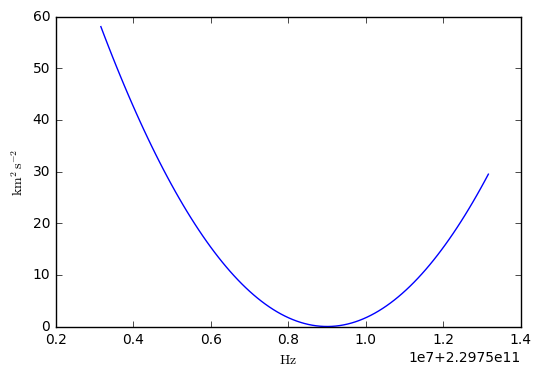

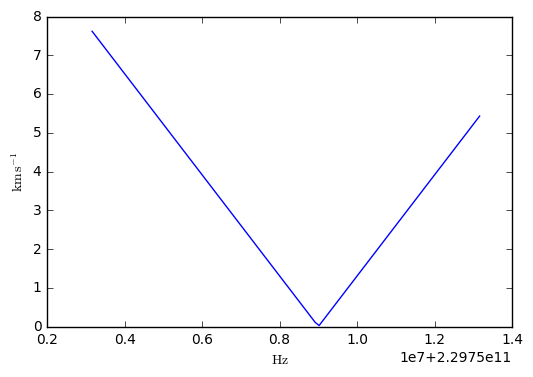

In [9]:
plt.plot(flis,vels*vels)
plt.figure()
plt.plot(flis,np.sqrt(vels*vels))

## Opening and feature test

In [10]:
point=orion_center.copy()
point[0]=orion.wcs.wcs.restfrq*u.Hz
delta=5*orion_resolution
box=opening(orion,point,delta)
box

(array([ 4, 45, 45]), array([14, 55, 55]))

## Cut the cube for that opening

In [11]:
orion_cut = cut(orion,lower=box[0],upper=box[1])
extent(orion_cut)

(array([<Quantity 229761207976.91684 Hz>, <Quantity -5.376944444191079 deg>,
        <Quantity 83.81034967761168 deg>], dtype=object),
 array([<Quantity 229756324615.70895 Hz>, <Quantity -5.375833333079939 deg>,
        <Quantity 83.80923365674673 deg>], dtype=object))

In [12]:
feat=features(orion,lower=box[0],upper=box[1])
feat
#np.array([x.data for x in feat.columns])

FREQ,DEC,RA
Hz,deg,deg
float64,float64,float64
229761207977.0,-5.37694444419,83.8103496776
229761207977.0,-5.37694444428,83.8102380754
229761207977.0,-5.37694444435,83.8101264732
229761207977.0,-5.3769444444,83.810014871
229761207977.0,-5.37694444443,83.8099032689
229761207977.0,-5.37694444444,83.8097916667
229761207977.0,-5.37694444443,83.8096800645
229761207977.0,-5.3769444444,83.8095684623


## Plot it in 3D

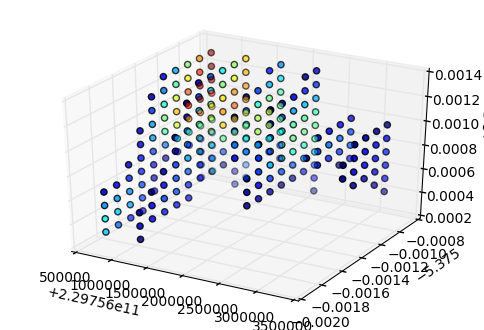

In [13]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
rav=orion_cut.data.ravel()
pm=rav>2.0
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['FREQ'].data[pm],feat['DEC'].data[pm],feat['RA'].data[pm],c=rav[pm])
col=feat.columns[0]

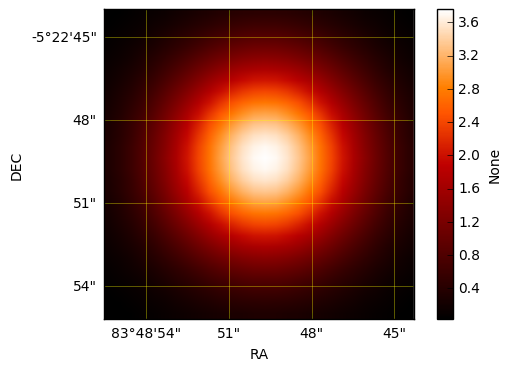

In [14]:
P=2000000.0*np.array([[0.000000000000000001,0.,0.],[0.,1.,0.],[0.,0.,1.]])
(G,lg,ug)=world_gaussian(orion,point,P,1.0,0.1)
visualize(G.sum(axis=0),wcs=moment0(orion).wcs)

## Flux related quanties

In [15]:
noise_level(orion)

<Quantity 0.6962183893949565 Jy / beam>

In [16]:
(std_orion,a,b)=standarize(orion)
noise=noise_level(std_orion)
noise

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


<Quantity 2.607718957793632e-06 Jy / beam>

In [17]:
new_orion=unstandarize(std_orion,a,b)
noise_level(new_orion)

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


<Quantity 0.6962183893949565 Jy / beam>

In [27]:
#should be automatic!
den_orion=denoise(std_orion,threshold=noise)
noise_level(den_orion)

<Quantity 1.5215892842546768e-06 Jy / beam>

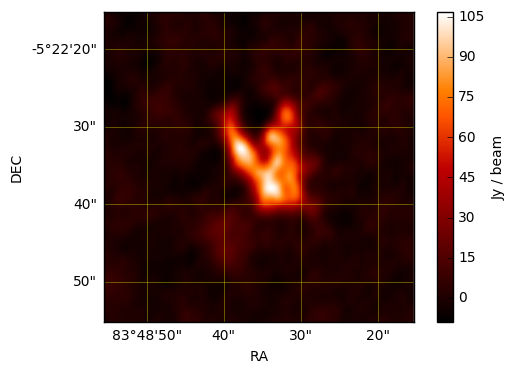

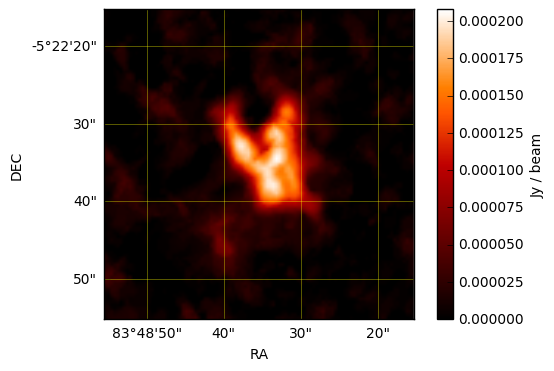

In [28]:
visualize(moment0(orion))
visualize(moment0(den_orion))

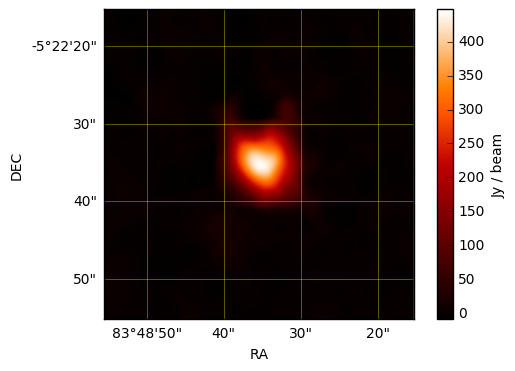

In [29]:
new_orion=add(orion,G*100.,lg,ug)
visualize(moment0(new_orion))

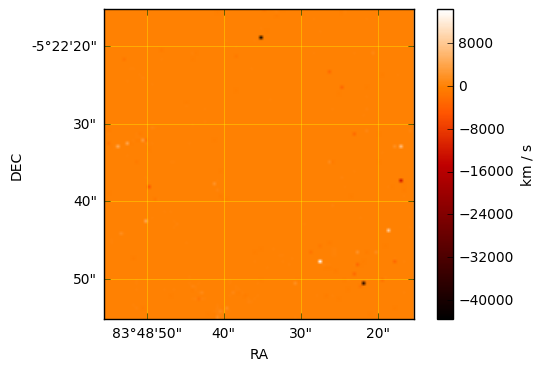

In [30]:
## WTF and Denoise!
visualize(moment1(orion))

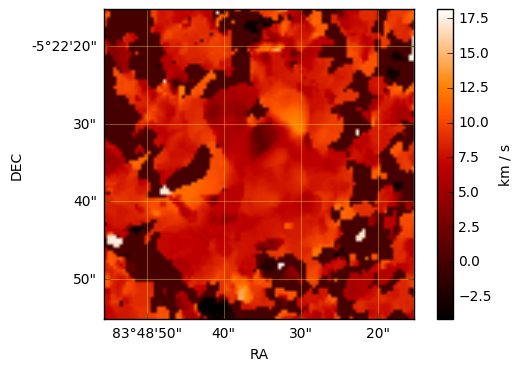

In [31]:
visualize(moment1(den_orion))

../ACALIB/acalib/upi/reduction.py:35: RuntimeWarning: invalid value encountered in sqrt
  m2=np.sqrt(beta*var/m0 - m1*m1)


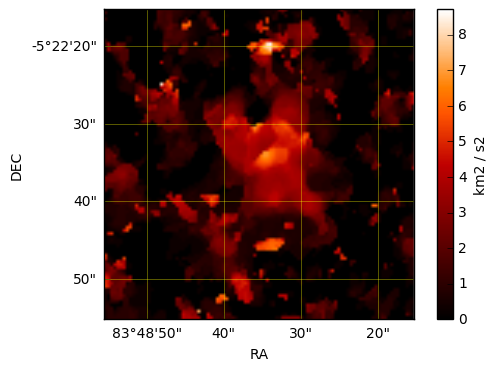

In [32]:
visualize(moment2(den_orion))

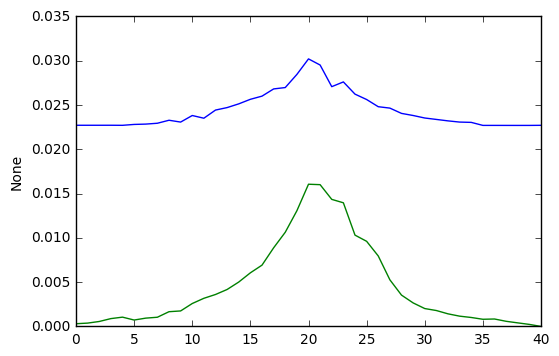

In [37]:
#TODO: Spectra
dd=orion.data.shape[1]
visualize(spectra(std_orion))
visualize(spectra(den_orion))